### Funções de correlação e convolução

As duas funções da célula abaixo são idênticas às do notebook "Correlação e Convolução". Redefinimos elas abaixo para simplificar o código deste notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def correlation(img, w):

    num_rows, num_cols = img.shape
    num_rows_f, num_cols_f = w.shape      # num_rows_f=a+1 e num_cols_f=b+1 (a e b na fórmula acima)

    half_num_rows_f = num_rows_f//2       # O operador // retorna a parte inteira da divisão
    half_num_cols_f = num_cols_f//2

    # Cria imagem com zeros ao redor da borda
    img_padded = np.zeros((num_rows+2*half_num_rows_f, num_cols+2*half_num_cols_f), dtype=img.dtype)
    for row in range(num_rows):
        for col in range(num_cols):   
            img_padded[row+half_num_rows_f, col+half_num_cols_f] = img[row, col]
    # A estrutura for aninhada acima pode ser substituída por
    #img_padded = np.pad(img, ((half_num_rows_f,half_num_rows_f),(half_num_cols_f,half_num_cols_f)), mode='constant')
    
    img_filtered = np.zeros((num_rows, num_cols))
    for row in range(num_rows):
        for col in range(num_cols):
            sum_region = 0
            for s in range(num_rows_f):
                for t in range(num_cols_f):
                    # O índice do array na soma abaixo é diferente do utilizado na fórmula da 
                    # correlação porque estamos utilizando a imagem preenchida com zeros. O 
                    # pixel (0,0)  na imagem preenchida corresponde ao pixel (x+s-a/2, y+t-b/2) 
                    # da imagem original
                    sum_region += w[s, t]*img_padded[row+s, col+t]
            img_filtered[row, col] = sum_region

            # O loop aninhado acima pode ser substituído por
            # patch = img_padded[row:row+num_rows_f, col:col+num_cols_f]
            # img_filtered[row, col] = np.sum(w*patch)
            
    return img_filtered

def convolution(img, w):

    # Inverte o filtro
    w_inv = w[::-1, ::-1]

    img_filtered = correlation(img, w_inv)

    return img_filtered

# Filtro Gaussiano

In [2]:
def gaussian_filter_2d(filter_size):
    sigma = filter_size/6.
    x_vals = np.linspace(-3*sigma, 3*sigma, filter_size)
    y_vals = x_vals.copy()
    z = np.zeros((filter_size, filter_size))
    for row in range(filter_size):
        x = x_vals[row]
        for col in range(filter_size):
            y = y_vals[col]
            z[row, col] = np.exp(-(x**2+y**2)/(2*sigma**2))
    z = z/np.sum(z)

    return z

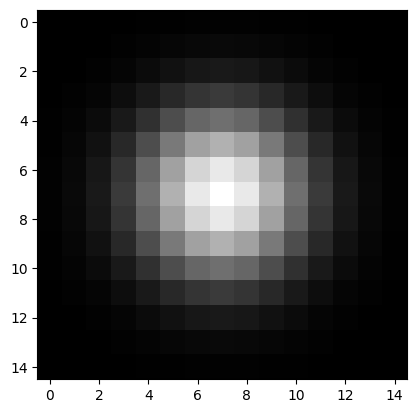

In [3]:
w = gaussian_filter_2d(15)
plt.imshow(w, 'gray')

In [4]:
img = plt.imread('imagens/cameraman.tiff')
img_filtered = convolution(img, w)

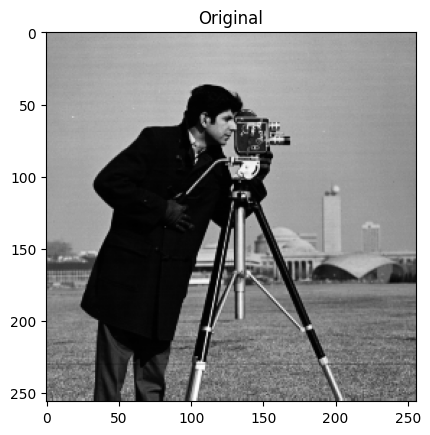

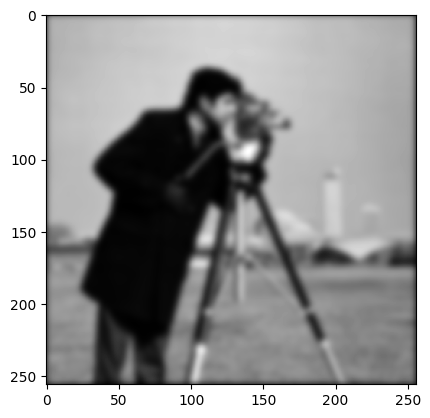

In [15]:
plt.figure()
plt.imshow(img, 'gray')
plt.title('Original')
plt.figure()
plt.imshow(img_filtered, 'gray')

# Filtragem mediana

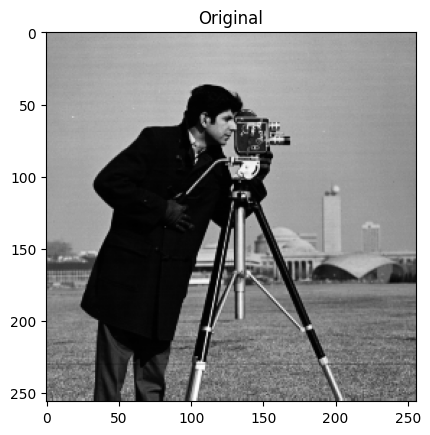

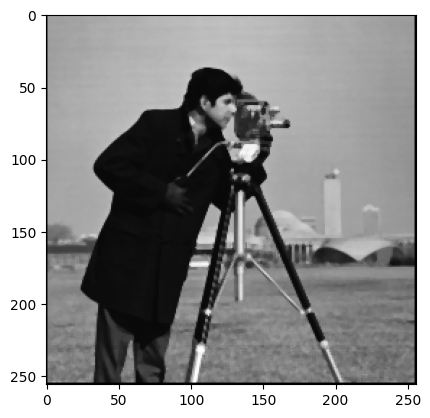

In [14]:
import numpy as np
import matplotlib.pyplot as plt

filter_size = 3
img_filt = np.zeros(img.shape)
for y in range(filter_size//2, img.shape[0]-filter_size//2):
    for x in range(filter_size//2, img.shape[1]-filter_size//2):
        img_filt[y,x] = np.median(img[y-filter_size//2:y+filter_size//2+1, x-filter_size//2:x+filter_size//2+1])

plt.figure()
plt.imshow(img, 'gray')
plt.title('Original')
plt.figure()
plt.imshow(img_filt, 'gray')

# Filtro Média Geométrica

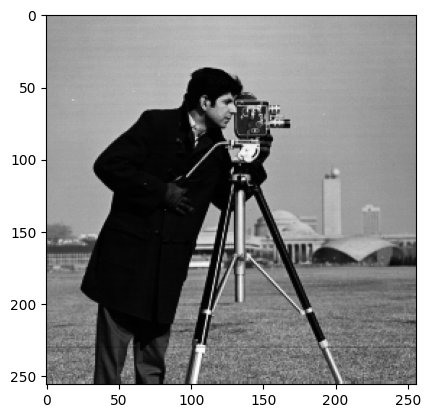

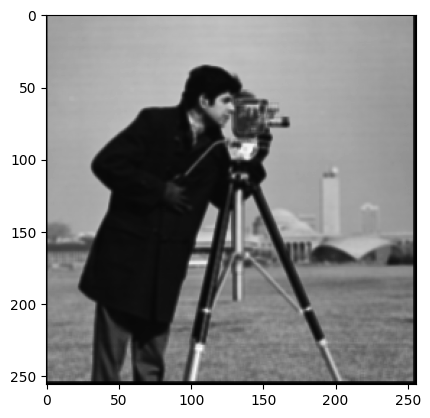

In [13]:
img = plt.imread('imagens/cameraman.tiff')

filter_size = 3
img_geo = np.zeros(img.shape)
img=img.astype(float)

for y in range(filter_size//2, img.shape[0]-filter_size//2):
    for x in range(filter_size//2, img.shape[1]-filter_size//2):
        # Pega todos os vizinhos
        neighbors = img[y:y+filter_size, x:x+filter_size]
        # Média Geométrica dos vizinhos
        img_geo[y,x] = np.prod(neighbors) ** (1/(filter_size**2))
        
plt.figure()
plt.imshow(img, 'gray')
plt.figure()
plt.imshow(img_geo, 'gray')